In [36]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt
import tensorflow as tf


In [38]:
from tensorflow import keras

In [39]:
%matplotlib inline


In [40]:
from keras.datasets import fashion_mnist

In [41]:
from keras.models import Sequential

In [42]:
from keras.layers import Dense, Dropout
from keras import utils

In [43]:
#обучающая и тест выборка

In [44]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [45]:
class_names = ["T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [46]:
# нормализация данных

In [47]:
x_train = x_train / 255
x_test = x_test / 255

In [48]:
#модель нейронной сети

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [50]:
#Компиляция модели

In [51]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
#Training

In [55]:
model.fit(x_train, y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3703 - accuracy: 0.8711
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3638 - accuracy: 0.8738
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3579 - accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3519 - accuracy: 0.8791
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3461 - accuracy: 0.8793
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.8812
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3367 - accuracy: 0.8820
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3327 - accuracy: 0.8834
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3293 - accuracy: 0.8850
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.324

In [56]:
#Test model accuracy

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3853 - accuracy: 0.8643
Test accuracy:  0.864300012588501


In [58]:
#Predictions

In [60]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [62]:
predictions[0]

array([1.2817718e-08, 8.5806728e-10, 1.5137217e-09, 5.0851630e-09,
       2.6201152e-09, 4.1451881e-04, 1.6645987e-07, 2.1988135e-03,
       5.3987883e-06, 9.9738115e-01], dtype=float32)

In [68]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [69]:
class_names[y_train[0]]

'Ankle boot'

Введите номер изображения: 256
6
Результат:  Shirt ,  Ожидаемый результат: Shirt


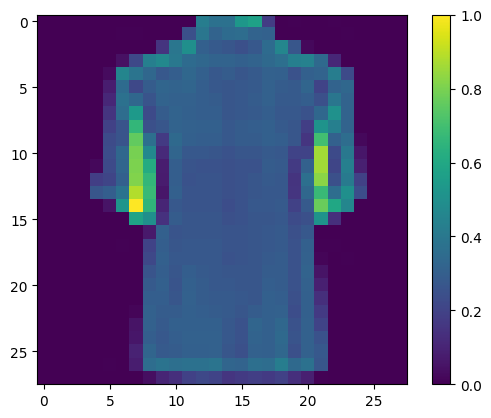

In [76]:
inp = int(input("Введите номер изображения: "))
x = np.argmax(predictions[inp])
print(x)
y = class_names[x]
y_expected = class_names[y_train[inp]]
plt.figure()
plt.imshow(x_train[inp])
plt.colorbar()
plt.grid(False)
print("Результат: ", y, ", ", "Ожидаемый результат:", y_expected)